Sugestão
- use o google colab, assim conseguirá acompanhar sem problemas com instalação de pacotes.
- o uso processamento virtual ajudará na perfomace caso use algoritmos com muito processamento
- 

In [ ]:
# caso não tenhamos instalado o pacote yfinance, usaremos esse comando.

!pip install yfinance

In [5]:
import yfinance as yf
#documentation: https://github.com/ranaroussi/yfinance


msft = yf.Ticker("MSFT")
baba = yf.Ticker("BABA")
aapl = yf.Ticker("AAPL")
fb = yf.Ticker("FB")
amzn = yf.Ticker("AMZN")
goog = yf.Ticker("GOOG")

print(msft)

yfinance.Ticker object <MSFT>


In [6]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", period="now")

[*********************100%***********************]  6 of 6 completed


In [7]:
import datetime as dt
from datetime import timedelta
from datetime import date

end = date.today()
start = end - timedelta(days=20)


df = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", start, end)

df_Close = df['Close']

df_Close


[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,BABA,FB,GOOG,MSFT
Date,,,,,,
2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-19,151.000000,118.209999,104.750000,175.779999,114.620003,259.529999
2022-07-20,153.039993,122.769997,103.959999,183.089996,114.699997,262.269989
2022-07-21,155.350006,124.629997,105.129997,183.169998,115.040001,264.839996
2022-07-22,154.089996,122.419998,100.610001,169.270004,108.360001,260.359985
2022-07-25,152.949997,121.139999,101.059998,166.649994,108.209999,258.829987
2022-07-26,151.600006,114.809998,101.440002,159.149994,105.440002,251.899994
2022-07-27,156.789993,120.970001,102.779999,169.580002,113.599998,268.739990
2022-07-28,157.350006,122.279999,100.550003,160.720001,114.589996,276.410004


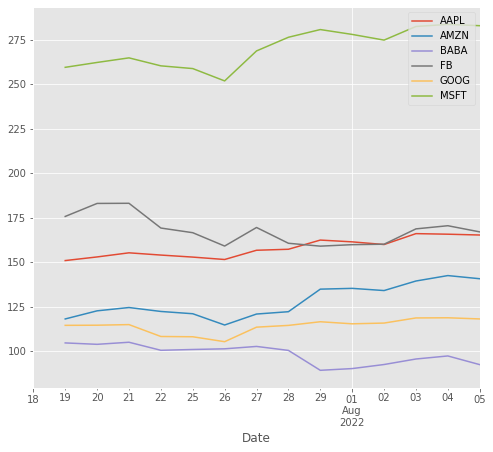

In [14]:
import matplotlib.pyplot as plt
style.use('ggplot')

#%matplotlib inline
# Plot the close price of the AAPL
df_Close.plot()

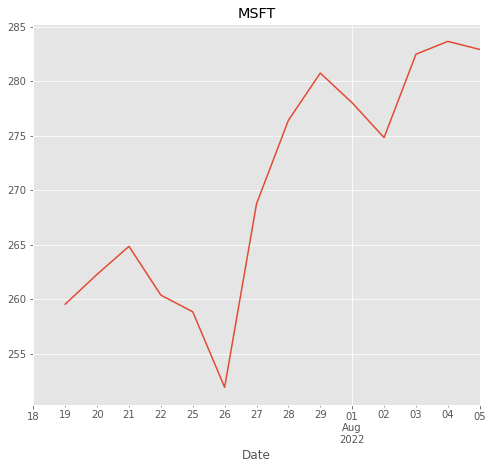

In [15]:
companies = []

for i in df_Close:
    companies.append(i)
    
c=0
    
for i in companies:
    plt.clf()
    df_Close[i].plot(title = i)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76b354f890>,
      dtype=object)

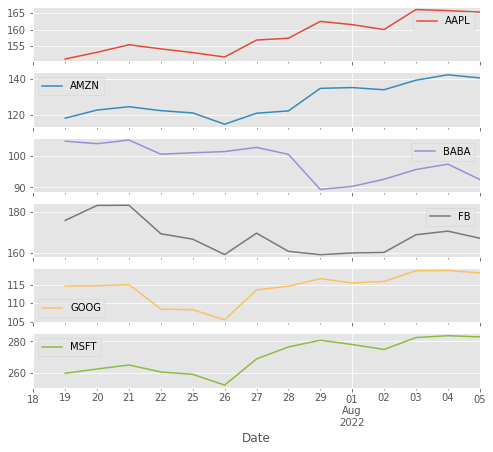

In [13]:
df_Close.plot(subplots=True)

In [11]:
#calculating the moving average

end = date.today()
start = end - timedelta(days=100)

msft_df = pdr.get_data_yahoo("MSFT", start, end)


close_px = msft_df['Adj Close']
mavg = close_px.rolling(window=10).mean()

mavg

[*********************100%***********************]  1 of 1 completed


Date
2022-05-02           NaN
2022-05-03           NaN
2022-05-04           NaN
2022-05-05           NaN
2022-05-06           NaN
                 ...    
2022-08-01    266.162994
2022-08-02    267.691995
2022-08-03    269.711996
2022-08-04    271.592996
2022-08-05    273.847998
Name: Adj Close, Length: 67, dtype: float64

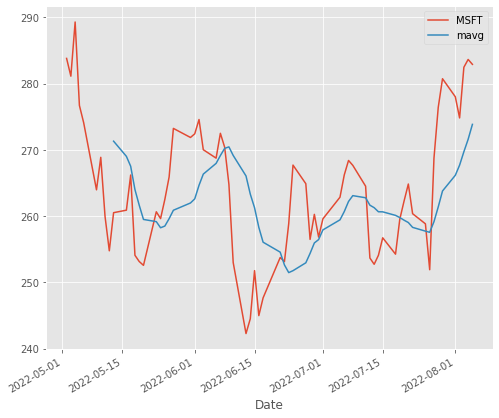

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

close_px.plot(label='MSFT')
mavg.plot(label='mavg')
plt.legend()